In [37]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [38]:
df = pd.read_csv('..\Cleaned_Data\cleaned_merged_data.csv')

In [39]:
df['year'] = pd.to_datetime(df['Invoice_DateTime']).dt.year

In [40]:
df['month'] = pd.to_datetime(df['Invoice_DateTime']).dt.month

In [41]:
df["Invoice_DateTime"]=pd.to_datetime(df["Invoice_DateTime"],dayfirst=True)
df["JobCard_DateTime"]=pd.to_datetime(df["JobCard_DateTime"],dayfirst=True)
df['Service_Time'] = df['Invoice_DateTime'] - df['JobCard_DateTime']

In [42]:
df['Service_Time_Hrs'] = df['Service_Time']/np.timedelta64(1,'h')

In [43]:
df['Service_Time_Hrs'].describe()

count   936275.000000
mean        89.878782
std        275.095915
min         -0.009167
25%          4.048611
50%         23.258889
75%         73.230278
max      17769.261389
Name: Service_Time_Hrs, dtype: float64

In [44]:
df[df['Service_Time_Hrs']<0]

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_CITY,Clean_District,Clean_Location_Area,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,year,month,Service_Time_Hrs
714423,714423,Retail,182085,00:00:00,7167000988,363294,62001,0.000000,MARUTI SUZUKI,0.000000,SWIFT DZIRE,0.000000,Running Repairs,0.000000,603103,X085,X085 - SRI MOTORS,NO,0.000000,0.000000,X085SA1,2016-05-02 15:12:11,2016-05-02 15:12:44,-1 days +23:59:27,Kanchipuram,Tamil Nadu,"Kelambakkam, Padur, Thaiyur, Pudupakkam",191639,1.000000,Z001,363294.000000,G2TX,0.000000,0.000000,2016,5,-0.009167


In [45]:
df.drop(index=714423,axis=0,inplace=True)

In [46]:
df[df['Service_Time_Hrs']<0]

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_CITY,Clean_District,Clean_Location_Area,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,year,month,Service_Time_Hrs


In [47]:
df['Service_Time_Hrs'].describe()

count   936274.000000
mean        89.878878
std        275.096046
min          0.010000
25%          4.048611
50%         23.259028
75%         73.230278
max      17769.261389
Name: Service_Time_Hrs, dtype: float64

### Clustering 

In [48]:
df.head()

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_CITY,Clean_District,Clean_Location_Area,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,year,month,Service_Time_Hrs
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,Thane,Maharashtra,"Thane H.O, Thane Bazar, Thane R.S.",71941,1.000000,Z007,168303.000000,P001,1203.140000,73.000000,2015,1,477.014722
1,1,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,Thane,Maharashtra,"Thane H.O, Thane Bazar, Thane R.S.",71941,1.000000,Z007,168303.000000,P002,2348.750000,6.500000,2015,1,477.014722
2,2,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,Thane,Maharashtra,"Thane H.O, Thane Bazar, Thane R.S.",71941,1.000000,Z007,168303.000000,P010,500.060000,1.000000,2015,1,477.014722
3,3,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,Thane,Maharashtra,"Kopri Colony, Thane East",89441,1.000000,Z001,173997.000000,P001,804.260000,170.000000,2015,1,19.920556
4,4,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,Thane,Maharashtra,"Kopri Colony, Thane East",89441,1.000000,Z001,173997.000000,P011,197.030000,1.000000,2015,1,19.920556


In [118]:
df[df['Cust Type']=='Insurance']

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_CITY,Clean_District,Clean_Location_Area,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity,year,month,Service_Time_Hrs
61202,61202,Insurance,EMA120,00:00:00,7022200615,207094,46431,950.030000,MARUTI SUZUKI,200.010000,ALTO,0.000000,Running Repairs,3085.450000,400051,BC18,COIMBATORE,NO,0.000000,4235.490000,BC18SA1,2015-04-23 17:53:04,2015-04-21 17:16:11,2 days 00:36:53,Mumbai,Maharashtra,"Audit Bhavan, Kherwadi, B.N. Bhavan, Bandra(East)",EMA120,1.000000,Z005,207094.000000,P001,950.030000,132.000000,2015,4,48.614722
61203,61203,Insurance,EMA120,00:00:00,7022200615,207094,46431,950.030000,MARUTI SUZUKI,200.010000,ALTO,0.000000,Running Repairs,3085.450000,400051,BC18,COIMBATORE,NO,0.000000,4235.490000,BC18SA1,2015-04-23 17:53:04,2015-04-21 17:16:11,2 days 00:36:53,Mumbai,Maharashtra,"Audit Bhavan, Kherwadi, B.N. Bhavan, Bandra(East)",EMA120,1.000000,Z005,207094.000000,P002,3085.450000,11.500000,2015,4,48.614722
61204,61204,Insurance,EMA120,00:00:00,7022200615,207094,46431,950.030000,MARUTI SUZUKI,200.010000,ALTO,0.000000,Running Repairs,3085.450000,400051,BC18,COIMBATORE,NO,0.000000,4235.490000,BC18SA1,2015-04-23 17:53:04,2015-04-21 17:16:11,2 days 00:36:53,Mumbai,Maharashtra,"Audit Bhavan, Kherwadi, B.N. Bhavan, Bandra(East)",EMA120,1.000000,Z005,207094.000000,P011,200.010000,1.000000,2015,4,48.614722


In [49]:
#### Selecting columns required for clustering

cluster_df = df[['Cust Type','Customer No.','Make','Model','Order Type','Clean_CITY','Clean_Location_Area','Invoice No','Service_Time_Hrs','Total Amt Wtd Tax.','Net value']]

In [50]:
cluster_df.isnull().sum()

Cust Type                  0
Customer No.               0
Make                       0
Model                   3185
Order Type                 0
Clean_CITY             94162
Clean_Location_Area    94162
Invoice No                 0
Service_Time_Hrs           0
Total Amt Wtd Tax.         0
Net value                 39
dtype: int64

In [51]:
cluster_df = cluster_df[cluster_df['Model'].notnull()]
cluster_df = cluster_df[cluster_df['Clean_CITY'].notnull()]
cluster_df = cluster_df[cluster_df['Clean_Location_Area'].notnull()]
cluster_df = cluster_df[cluster_df['Net value'].notnull()]

In [52]:
cluster_df.isnull().sum()

Cust Type              0
Customer No.           0
Make                   0
Model                  0
Order Type             0
Clean_CITY             0
Clean_Location_Area    0
Invoice No             0
Service_Time_Hrs       0
Total Amt Wtd Tax.     0
Net value              0
dtype: int64

In [53]:
cluster_df.shape

(839153, 11)

In [54]:
cluster_df.head()

,Cust Type,Customer No.,Make,Model,Order Type,Clean_CITY,Clean_Location_Area,Invoice No,Service_Time_Hrs,Total Amt Wtd Tax.,Net value
0,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane H.O, Thane Bazar, Thane R.S.",7005200002,477.014722,4051.950000,1203.140000
1,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane H.O, Thane Bazar, Thane R.S.",7005200002,477.014722,4051.950000,2348.750000
2,Retail,67849,GENERAL MOTORS,SPARK,Paid Service,Thane,"Thane H.O, Thane Bazar, Thane R.S.",7005200002,477.014722,4051.950000,500.060000
3,Retail,84419,TATA MOTORS,INDICA,SMC Value Package,Thane,"Kopri Colony, Thane East",7005200003,19.920556,1001.290000,804.260000
4,Retail,84419,TATA MOTORS,INDICA,SMC Value Package,Thane,"Kopri Colony, Thane East",7005200003,19.920556,1001.290000,197.030000


### Selecting columns required for clustering

In [55]:
clusters = cluster_df.groupby(['Customer No.','Cust Type','Make','Model','Clean_CITY','Order Type']).agg(
                                {
                                 'Invoice No':'nunique',
                                 'Net value':'sum',
                                 'Service_Time_Hrs':'mean'
                                }
                            )

In [56]:
clusters.head()

Invoice No  \
Customer No. Cust Type Make           Model   Clean_CITY Order Type                    
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service              1   
                                      OMNI    Pune       Paid Service              2   
                                                         Running Repairs           1   
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service              4   
                                                         Running Repairs           1   

                                                                            Net value  \
Customer No. Cust Type Make           Model   Clean_CITY Order Type                     
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service        0.000000   
                                      OMNI    Pune       Paid Service        0.000000   
                                                         Running Repairs     0.000000   
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service    10505.720000   
                                                         Running Repairs   599.840000   

                                                                          Service_Time_Hrs  
Customer No. Cust Type Make           Model   Clean_CITY Order Type                         
1            Retail    MARUTI SUZUKI  KIZASHI Pune       Paid Service           901.082222  
                                      OMNI    Pune       Paid Service          2674.040000  
                                                         Running Repairs        321.365833  
10           Retail    GENERAL MOTORS OPTRA   Mumbai     Paid Service            20.744222  
                                                         Running Repairs          3.071389

In [57]:
clusters.columns

Index(['Invoice No', 'Net value', 'Service_Time_Hrs'], dtype='object')

In [58]:
clusters.columns =['Total Invoices','Total Revenue','Total Servicing Hrs']

In [59]:
clusters = clusters.reset_index()

In [60]:
clusters.shape

(310983, 9)

### Cluster Analysis

#### Separating customers with zero revenue

In [61]:
zero_spenders = clusters[clusters['Total Revenue']<=0]

In [62]:
zero_spenders.shape

(26327, 9)

In [63]:
zero_spenders['Clusters'] = 'zero_spenders'

In [64]:
zero_spenders.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,Clusters
0,1,Retail,MARUTI SUZUKI,KIZASHI,Pune,Paid Service,1,0.000000,901.082222,zero_spenders
1,1,Retail,MARUTI SUZUKI,OMNI,Pune,Paid Service,2,0.000000,2674.040000,zero_spenders
2,1,Retail,MARUTI SUZUKI,OMNI,Pune,Running Repairs,1,0.000000,321.365833,zero_spenders
10,10000,Retail,MARUTI SUZUKI,WAGONR,Hyderabad,SMC Redemption,2,0.000000,1.629167,zero_spenders
16,100002,Retail,FORD,FIGO,Panchkula,Running Repairs,1,0.000000,0.113333,zero_spenders


#### Separating customers with non zero spends

In [65]:
non_zero = clusters[clusters['Total Revenue']>0]

In [66]:
non_zero.shape

(284656, 9)

In [67]:
print("0.05 quantile :-",non_zero['Total Revenue'].quantile(0.05))
print("0.25 quantile :-",non_zero['Total Revenue'].quantile(0.25))
print("0.50 quantile :-",non_zero['Total Revenue'].quantile(0.50))
print("0.75 quantile :-",non_zero['Total Revenue'].quantile(0.75))
print("0.95 quantile :-",non_zero['Total Revenue'].quantile(0.95))
print("minimum total revenue :-",non_zero['Total Revenue'].min())
print("maximum total revenue :-",non_zero['Total Revenue'].max())
print("mean total revenue :-",non_zero['Total Revenue'].mean())

0.05 quantile :- 148.58
0.25 quantile :- 696.8774999999998
0.50 quantile :- 2600.5
0.75 quantile :- 6875.282499999999
0.95 quantile :- 25853.585
minimum total revenue :- 0.01
maximum total revenue :- 3852506.8100000084
mean total revenue :- 6912.321603901306


In [68]:
print("0.05 quantile :-",non_zero['Total Servicing Hrs'].quantile(0.05))
print("0.25 quantile :-",non_zero['Total Servicing Hrs'].quantile(0.25))
print("0.50 quantile :-",non_zero['Total Servicing Hrs'].quantile(0.50))
print("0.75 quantile :-",non_zero['Total Servicing Hrs'].quantile(0.75))
print("0.95 quantile :-",non_zero['Total Servicing Hrs'].quantile(0.95))
print("mimimum servicing time in hrs :-",non_zero['Total Servicing Hrs'].min())
print("maximum servicing time in hrs :-",non_zero['Total Servicing Hrs'].max())
print("mean servicing time in hrs :-",non_zero['Total Servicing Hrs'].mean())

0.05 quantile :- 0.23055555555555557
0.25 quantile :- 3.3830555555555555
0.50 quantile :- 21.02954861111111
0.75 quantile :- 72.82111111111112
0.95 quantile :- 387.2446875
mimimum servicing time in hrs :- 0.010277777777777778
maximum servicing time in hrs :- 17453.070833333335
mean servicing time in hrs :- 91.23086523167979


### Rule Based Clustering based on avg revenue

#### Rule based clustering is performed based on quantile analysis of total revenue column

In [69]:
# Low revenue customers (less than 0.50 quantile)
low_revenue = non_zero[(non_zero['Total Revenue']< non_zero['Total Revenue'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_revenue = non_zero[
                            (non_zero['Total Revenue'] > non_zero['Total Revenue'].quantile(0.50)) & 
                            (non_zero['Total Revenue']< non_zero['Total Revenue'].quantile(0.75))
                         ]

# Average revenue customers (between 0.75 to 0.95 quantile)
avg_revenue = non_zero[
                        (non_zero['Total Revenue'] > non_zero['Total Revenue'].quantile(0.75)) & 
                        (non_zero['Total Revenue'] < non_zero['Total Revenue'].quantile(0.95))
                      ]

# High revenue customers (moe than 0.95 quantile)
high_revenue = non_zero[
                        (non_zero['Total Revenue'] > non_zero['Total Revenue'].quantile(0.95))
                       ]

In [70]:
print(low_revenue.shape)
print(medium_revenue.shape)
print(avg_revenue.shape)
print(high_revenue.shape)

(142326, 9)
(71163, 9)
(56931, 9)
(14233, 9)


In [71]:
# Naming the clusters
low_revenue['Clusters'] = 'low_revenue'
medium_revenue['Clusters'] = 'medium_revenue'
avg_revenue['Clusters'] = 'avg_revenue'
high_revenue['Clusters'] = 'high_revenue'

In [72]:
revenue_clust = pd.concat([low_revenue,medium_revenue,avg_revenue,high_revenue],axis=0)

In [73]:
revenue_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Revenue',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
high_revenue,56448.374909,349.862933,14233
avg_revenue,12768.362427,133.725734,56931
medium_revenue,4312.884887,76.767076,71163
low_revenue,915.945283,55.597661,142326


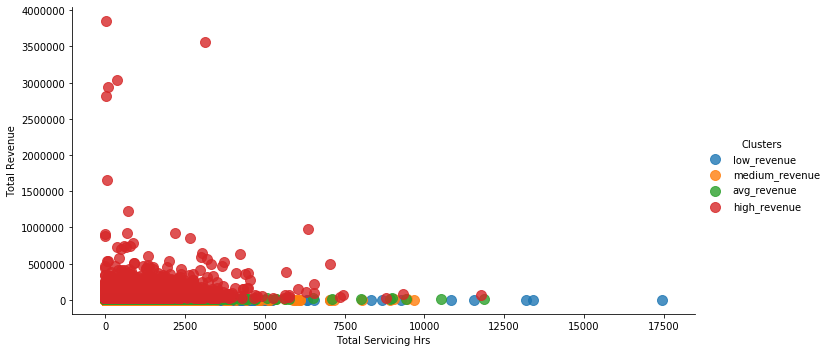

In [105]:
import seaborn as sns
sns.lmplot(data=revenue_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

### Rule Based Clustering based on avg servicing time

In [75]:
# super fast service (less than 0.50 quantile)
super_fast = non_zero[non_zero['Total Servicing Hrs']< non_zero['Total Servicing Hrs'].quantile(0.50)]

# fast service (between 0.50 to 0.75 quantile)
fast = non_zero[
                (non_zero['Total Servicing Hrs']> non_zero['Total Servicing Hrs'].quantile(0.50)) & 
                (non_zero['Total Servicing Hrs']< non_zero['Total Servicing Hrs'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow = non_zero[
                (non_zero['Total Servicing Hrs'] > non_zero['Total Servicing Hrs'].quantile(0.75)) & 
                (non_zero['Total Servicing Hrs'] < non_zero['Total Servicing Hrs'].quantile(0.95))
                ]

# super fast service (more than 0.95 quantile)
super_slow = non_zero[
                        non_zero['Total Servicing Hrs'] > non_zero['Total Servicing Hrs'].quantile(0.95)
                     ]


In [76]:
print(super_fast.shape)
print(fast.shape)
print(slow.shape)
print(super_slow.shape)

(142328, 9)
(71164, 9)
(56931, 9)
(14233, 9)


In [77]:
super_fast['Clusters'] = 'super_fast'
fast['Clusters'] = 'fast'
slow['Clusters'] = 'slow'
super_slow['Clusters'] = 'super_slow'

In [78]:
f_clust = pd.concat([super_fast,fast,slow,super_slow],axis=0)

In [79]:
f_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Servicing Hrs',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
super_slow,26637.683708,922.303598,14233
slow,12746.639368,164.518031,56931
fast,6793.334705,39.476048,71164
super_fast,2665.532217,4.685069,142328


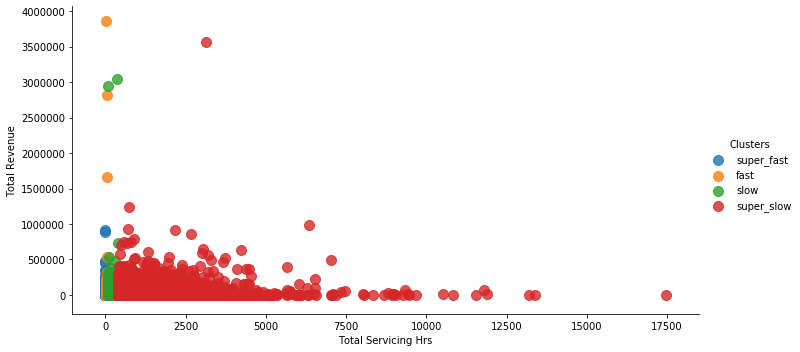

In [80]:
import seaborn as sns
sns.lmplot(data=f_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

### K-Means Clustering

In [81]:
final_cluster = non_zero

In [82]:
final_cluster.shape

(284656, 9)

In [83]:
final_cluster.describe()

,Total Invoices,Total Revenue,Total Servicing Hrs
count,284656.000000,284656.000000,284656.000000
mean,1.440328,6912.321604,91.230865
std,2.679905,21860.715802,279.271556
min,1.000000,0.010000,0.010278
25%,1.000000,696.877500,3.383056
50%,1.000000,2600.500000,21.029549
75%,1.000000,6875.282500,72.821111
max,925.000000,3852506.810000,17453.070833


In [84]:
final_cluster.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,20.744222
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,3.071389
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,98.988333
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,49.808333
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,5.224389


#### Label Encoding Categorical Columns

In [85]:
X = final_cluster.drop(['Customer No.'],axis=1)

In [86]:
le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
X["Model"]=le.fit_transform(X["Model"])
X["Clean_CITY"]=le.fit_transform(X["Clean_CITY"])
# final_cluster["Clean_Location_Area"]=le.fit_transform(final_cluster["Clean_Location_Area"])
X["Cust Type"]=le.fit_transform(X["Cust Type"])
X["Order Type"]=le.fit_transform(X["Order Type"])

In [87]:
X.head()

,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
3,6,6,146,286,2,4,10505.720000,20.744222
4,6,6,146,286,4,1,599.840000,3.071389
5,6,8,50,286,0,1,14167.070000,98.988333
6,6,8,50,286,2,1,6632.670000,49.808333
7,6,13,16,340,2,4,7617.270000,5.224389


#### Scaling the features

In [88]:
std = StandardScaler()
X=std.fit_transform(X)

In [89]:
scaled_data = pd.DataFrame(X)
scaled_data.columns = ['Cust Type','Make','Model','Clean_CITY','Order Type','Total Invoices','Total Revenue','Total Servicing Hrs']
scaled_data.head()

,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
0,0.040313,-1.221489,0.210503,0.355784,-0.566148,0.955137,0.164377,-0.252395
1,0.040313,-1.221489,0.210503,0.355784,0.763544,-0.164308,-0.288760,-0.315677
2,0.040313,-0.883150,-1.111337,0.355784,-1.895840,-0.164308,0.331863,0.027778
3,0.040313,-0.883150,-1.111337,0.355784,-0.566148,-0.164308,-0.012792,-0.148324
4,0.040313,-0.037302,-1.579489,0.768147,-0.566148,0.955137,0.032247,-0.307968


#### Calculating wcss score using elbow method

In [90]:
wcss=[]
for i in range(2,12):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

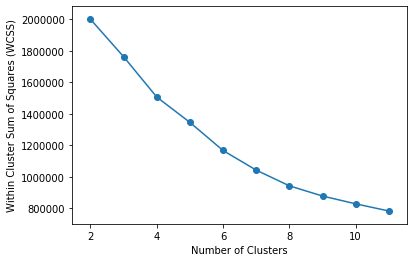

In [91]:
import matplotlib.pyplot as plt
x=np.arange(2,12)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

### Calculating silhoutte score

In [92]:
sil=[]
for j in range(2,11):
    kmeans=KMeans(n_clusters=j,init='k-means++',random_state=42)
    kmeans.fit(X)
    labels=kmeans.labels_
    centroids=kmeans.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

In [93]:
x=np.arange(2,11)
plt.plot(x,sil)
plt.scatter(x,sil)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [94]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [95]:
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [96]:
final_cluster["Clusters"]=clf_final.predict(X)

In [97]:
final_cluster.head()

,Customer No.,Cust Type,Make,Model,Clean_CITY,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,Clusters
3,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Paid Service,4,10505.720000,20.744222,3
4,10,Retail,GENERAL MOTORS,OPTRA,Mumbai,Running Repairs,1,599.840000,3.071389,3
5,100,Retail,HONDA,CITY,Mumbai,Accidental,1,14167.070000,98.988333,1
6,100,Retail,HONDA,CITY,Mumbai,Paid Service,1,6632.670000,49.808333,0
7,1000,Retail,MARUTI SUZUKI,ALTO,Pune,Paid Service,4,7617.270000,5.224389,0


In [159]:
final_cluster.to_csv('Final_Clusters.csv')

In [110]:
cluster_excel = final_cluster.groupby(["Clusters","Cust Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"}).sort_values('Total Revenue')

In [109]:
final_cluster.groupby(["Clusters","Order Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"})

Total Revenue  Total Servicing Hrs  Customer No.
Clusters Order Type                                                         
0        Accidental           4021.880611            27.439128          1391
         Mechanical           2430.099535            33.546376          3524
         Paid Service         5153.669770            49.879518         31837
         Running Repairs      3540.789418            48.986351         50634
         SMC Redemption       1839.594820            45.806554           305
         SMC Value Package    3667.416912             9.674040          3021
         WBW Order            6695.668333           202.312500             6
1        Accidental          23548.981757           259.260516         26921
         Mechanical           9831.968913           355.922127          1868
         Paid Service        23191.448248           837.075622          4377
         Running Repairs     35556.163969          1698.615497          1358
         SMC Redemption       3810.000000          1644.105755             3
         SMC Value Package    6248.430000          2576.583194             2
2        Accidental          10542.003692            88.911636          4605
         Mechanical           3167.913415            53.323424          2331
         Paid Service         6172.392141            72.747611         15119
         Running Repairs      3793.908525            55.412071         29094
         SMC Redemption       1864.579746            31.537255           118
         SMC Value Package    3478.713032            14.475320          1029
         WBW Order            4656.066667            80.627963             3
3        Accidental            519.302500             1.127361             8
         Mechanical           2357.366032            23.435851          3783
         Paid Service         5810.304044            44.459564         37113
         Repeat Order         3966.740000            22.913333             1
         Running Repairs      4303.242598            47.895488         61396
         SMC Redemption       1960.299295            53.553799           397
         SMC Value Package    4016.401763             7.893625          3970
         WBW Order            6685.176667            30.728426             3
4        Accidental        3037303.790000           369.677205             1
         Paid Service      2882405.470000            68.096548             2
         Running Repairs   2754689.780000            48.493794             2
5        Accidental          29677.605300           318.574034           100
         Mechanical          16937.623750           539.533112             8
         Paid Service        31725.117305           116.462312           141
         Running Repairs     29912.303481           139.658887           181
         SMC Value Package    7875.192500             7.359549             4

In [111]:
cluster_excel.columns = ['Avg revenue','Avg Servicing Hrs','Customer Count']

In [112]:
cluster_Excel = cluster_excel.reset_index()

In [113]:
cluster_excel.sort_values(by='Clusters')

Avg revenue  Avg Servicing Hrs  Customer Count
Clusters Cust Type                                                         
0        Retail              4068.523668          47.051228           90676
         Insurance           4235.490000          48.614722               1
         MFCWL               6796.386098          66.311059              41
1        MFCWL               7085.010000         131.316083              10
         Retail             23235.770799         394.675021           34519
2        Retail              5036.282761          62.412954           52277
         MFCWL               7387.954091          84.604473              22
3        Retail              4737.532404          44.351949          106631
         MFCWL               8533.126000          67.674397              40
4        Retail           2546749.223333         175.577159               3
         Fleets           3335623.310000          38.063205               2
5        Franchise           5285.037778         184.070540               9
         Corporate others   25047.215665         149.158144             173
         Fleets             32319.218939         197.237281             179
         Corporate- M&M     39126.807123         207.343617              73

In [114]:
cluster_excel.to_csv('cluster_representation.csv')

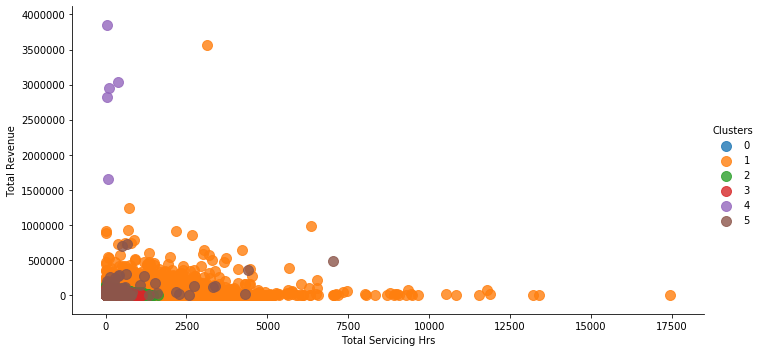

In [156]:
sns.lmplot(data=final_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})